<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_DT.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
[col for col in df.columns if df[col].isnull().any()]

[]

In [43]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [44]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [45]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [46]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuary is",metrics.accuracy_score(y_test,y_pred))

accuary is 0.7575757575757576


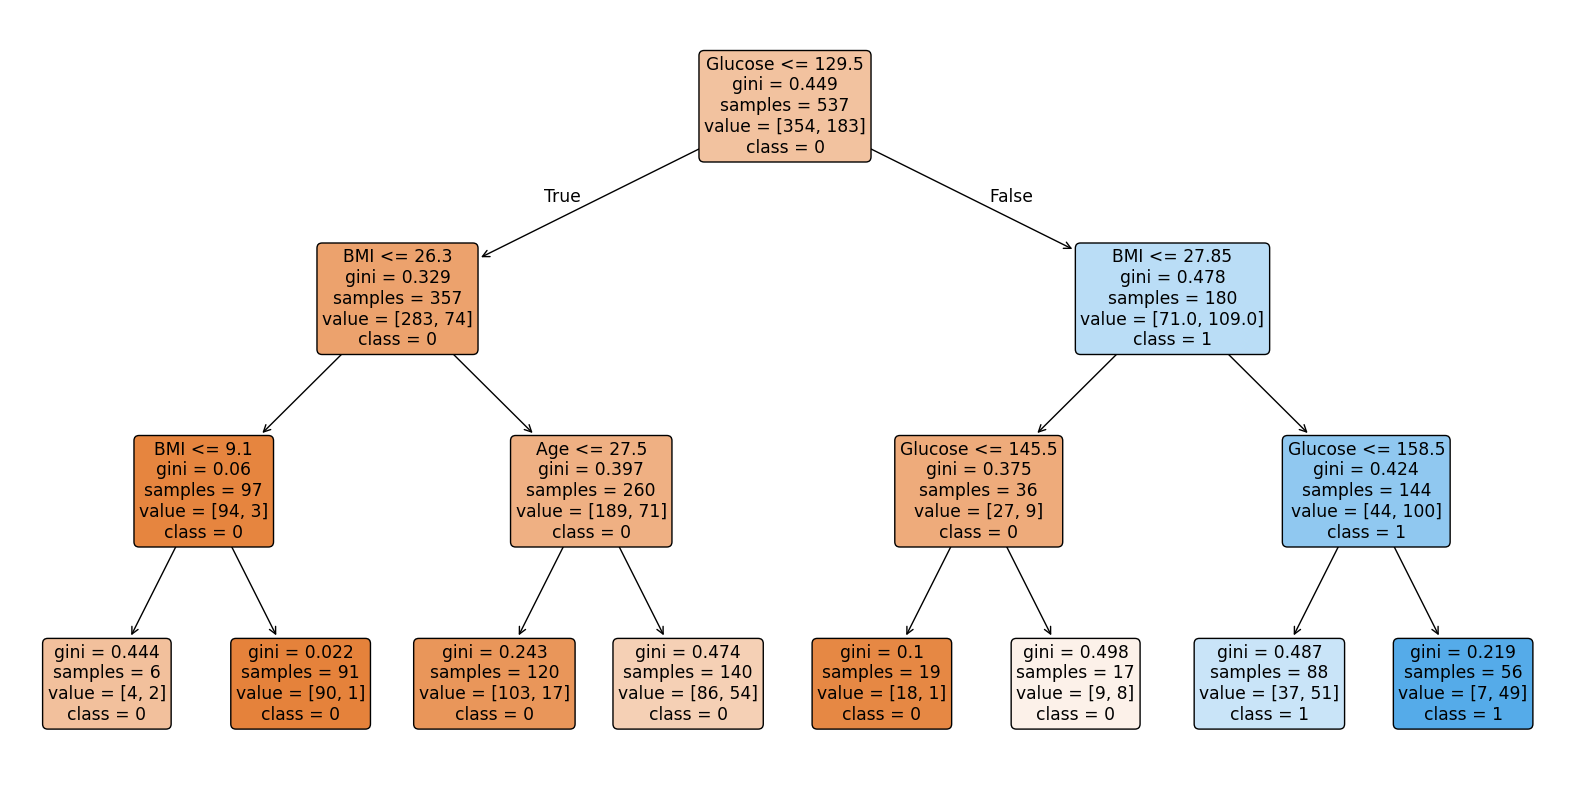

In [47]:
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,rounded=True,feature_names=x_train.columns,class_names=['0','1'])
plt.show()

In [48]:
print("accuracy score",metrics.accuracy_score(y_test,y_pred))
print("precision score",metrics.precision_score(y_test,y_pred))
print("recall score",metrics.recall_score(y_test,y_pred))
print("f1 score",metrics.f1_score(y_test,y_pred))

accuracy score 0.7575757575757576
precision score 0.7164179104477612
recall score 0.5647058823529412
f1 score 0.631578947368421


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))



Accuracy : 0.8138528138528138
Precision: 0.8
Recall   : 0.6588235294117647
F1-score : 0.7225806451612903


| **Metric**    | **Decision Tree** | **Random Forest** |
| ------------- | ----------------- | ----------------- |
| **Accuracy**  | 0.814             | 0.758             |
| **Precision** | 0.800             | 0.716             |
| **Recall**    | 0.659             | 0.565             |
| **F1-score**  | 0.723             | 0.632             |


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [63]:
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]
preds, probas, accs = [], [], []
for m in models:
    m.fit(x_train, y_train)
    p = m.predict(x_test)
    preds.append(p)
    probas.append(m.predict_proba(x_test))
    accs.append(accuracy_score(y_test, p))

# Max Voting
max_vote = np.array([np.bincount(row).argmax() for row in np.column_stack(preds)])

# Average Voting
avg_vote = np.argmax(np.mean(probas, axis=0), axis=1)

# Weighted Voting
weights = np.array(accs) / sum(accs)
weighted_proba = sum(w * p for w, p in zip(weights, probas))
weighted_vote = np.argmax(weighted_proba, axis=1)

# Evaluation function
def eval_model(name, y_pred):
    print(f"{name:<15} Acc={accuracy_score(y_test, y_pred):.3f}  Pre={precision_score(y_test, y_pred):.3f}  Rec={recall_score(y_test, y_pred):.3f}  F1={f1_score(y_test, y_pred):.3f}")

names = ["Logistic", "DecisionTree", "KNN", "MaxVoting", "AvgVoting", "WeightedVoting"]
for n, p in zip(names, preds + [max_vote, avg_vote, weighted_vote]):
    eval_model(n, p)


Logistic        Acc=0.784  Pre=0.778  Rec=0.576  F1=0.662
DecisionTree    Acc=0.710  Pre=0.636  Rec=0.494  F1=0.556
KNN             Acc=0.792  Pre=0.753  Rec=0.647  F1=0.696
MaxVoting       Acc=0.792  Pre=0.794  Rec=0.588  F1=0.676
AvgVoting       Acc=0.753  Pre=0.741  Rec=0.506  F1=0.601
WeightedVoting  Acc=0.766  Pre=0.754  Rec=0.541  F1=0.630


In [65]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Hard Voting
hard_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='hard')
hard_voting.fit(x_train, y_train)
y_pred_hard = hard_voting.predict(x_test)
hard_acc = accuracy_score(y_test, y_pred_hard)

# Soft Voting
soft_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
soft_acc = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Accuracy:", hard_acc)
print("Soft Voting Accuracy:", soft_acc)


Hard Voting Accuracy: 0.7922077922077922
Soft Voting Accuracy: 0.7532467532467533


In [67]:
configs = [
    {"n_estimators": 10, "max_depth": None},
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 100, "max_depth": 3},
    {"n_estimators": 100, "max_depth": 5},
]

print("Random Forest Bagging Performance")
for cfg in configs:
    rf = RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={cfg['n_estimators']}, max_depth={cfg['max_depth']} --> Accuracy: {acc:.4f}")


Random Forest Bagging Performance
n_estimators=10, max_depth=None --> Accuracy: 0.7619
n_estimators=50, max_depth=None --> Accuracy: 0.7965
n_estimators=100, max_depth=None --> Accuracy: 0.8139
n_estimators=100, max_depth=3 --> Accuracy: 0.7835
n_estimators=100, max_depth=5 --> Accuracy: 0.7879


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
configs = [10, 50, 100, 200]

print("RandomForestRegressor with OOB Score ")
for n in configs:
    rf = RandomForestRegressor(
        n_estimators=n,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f"n_estimators={n:3} | OOB Score: {rf.oob_score_:.4f} | Test R² Score: {test_r2:.4f}")


RandomForestRegressor with OOB Score 
n_estimators= 10 | OOB Score: 0.0499 | Test R² Score: 0.3416


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators= 50 | OOB Score: 0.1765 | Test R² Score: 0.3940
n_estimators=100 | OOB Score: 0.2035 | Test R² Score: 0.3808
n_estimators=200 | OOB Score: 0.2084 | Test R² Score: 0.3802


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
ada_acc = accuracy_score(y_test, ada.predict(x_test))

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(x_train, y_train)
gb_acc = accuracy_score(y_test, gb_clf.predict(x_test))


xgb = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb.fit(x_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))

cat = CatBoostClassifier(
    iterations=100,
    verbose=0,
    random_state=42
)
cat.fit(x_train, y_train)
cat_acc = accuracy_score(y_test, cat.predict(x_test))


print("\nBoosting Techniques: Classification ")
print(f"AdaBoost Accuracy         : {ada_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"XGBoost Accuracy          : {xgb_acc:.4f}")
print(f"CatBoost Accuracy         : {cat_acc:.4f}")


cal = df
Xr = cal.drop("Outcome",axis=1)
yr = cal["Outcome"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(Xr_train, yr_train)
gbr_r2 = r2_score(yr_test, gbr.predict(Xr_test))

print("\nGradient Boosting: Regression")
print(f"R² Score: {gbr_r2:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:34:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Boosting Techniques: Classification 
AdaBoost Accuracy         : 0.7619
Gradient Boosting Accuracy: 0.7965
XGBoost Accuracy          : 0.7576
CatBoost Accuracy         : 0.8052

Gradient Boosting: Regression
R² Score: 0.2447
